In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from metastability_common import *

Differences between groups.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.777e-02 U_stat=8.700e+01
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.054e-01 U_stat=7.200e+01


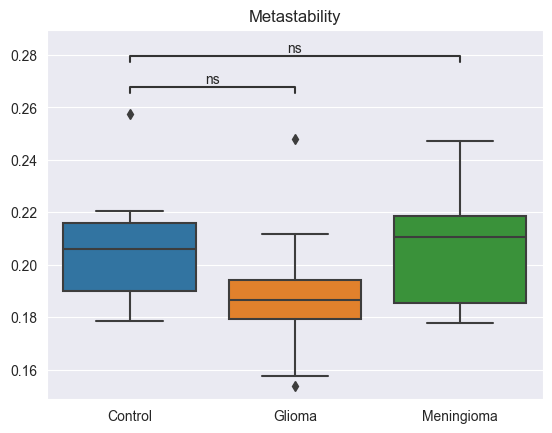

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. >= 15cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.155e-02 U_stat=9.600e+01


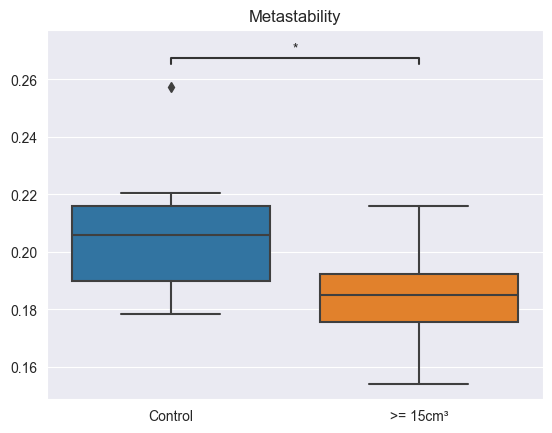

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.114e-01 U_stat=7.100e+01
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.617e-01 U_stat=9.800e+01


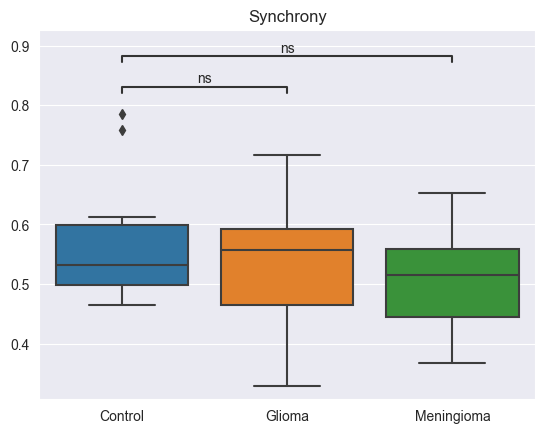

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. >= 15cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.307e-01 U_stat=7.300e+01


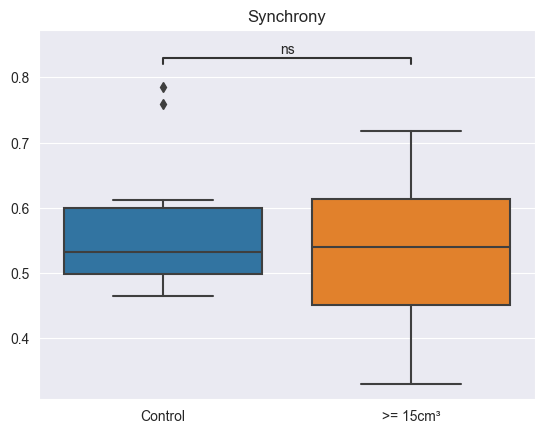

In [3]:
plotComparisonAcrossLabels2(
    {
        'Control': [v.metastability for k, v in subjects.get_control_subset().keep_only_from_this_set(metastabilities).items()],
        'Glioma': [v.metastability for k, v in subjects.get_glioma_subset().keep_only_from_this_set(metastabilities).items()],
        'Meningioma': [v.metastability for k, v in subjects.get_meningioma_subset().keep_only_from_this_set(metastabilities).items()],
    },
    graphLabel='Metastability',
    pairs=[('Control', 'Glioma'), ('Control', 'Meningioma')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v.metastability for k, v in subjects.get_control_subset().keep_only_from_this_set(metastabilities).items()],
        '>= 15cm³': [v.metastability for k, v in subjects.get_plus_x_cm3_subset(15.0).keep_only_from_this_set(metastabilities).items()],
    },
    graphLabel='Metastability',
    pairs=[('Control', '>= 15cm³')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v.synchrony for k, v in subjects.get_control_subset().keep_only_from_this_set(metastabilities).items()],
        'Glioma': [v.synchrony for k, v in subjects.get_glioma_subset().keep_only_from_this_set(metastabilities).items()],
        'Meningioma': [v.synchrony for k, v in subjects.get_meningioma_subset().keep_only_from_this_set(metastabilities).items()],
    },
    graphLabel='Synchrony',
    pairs=[('Control', 'Glioma'), ('Control', 'Meningioma')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v.synchrony for k, v in subjects.get_control_subset().keep_only_from_this_set(metastabilities).items()],
        '>= 15cm³': [v.synchrony for k, v in subjects.get_plus_x_cm3_subset(15.0).keep_only_from_this_set(metastabilities).items()],
    },
    graphLabel='Synchrony',
    pairs=[('Control', '>= 15cm³')]
)

Output control subjects metastability

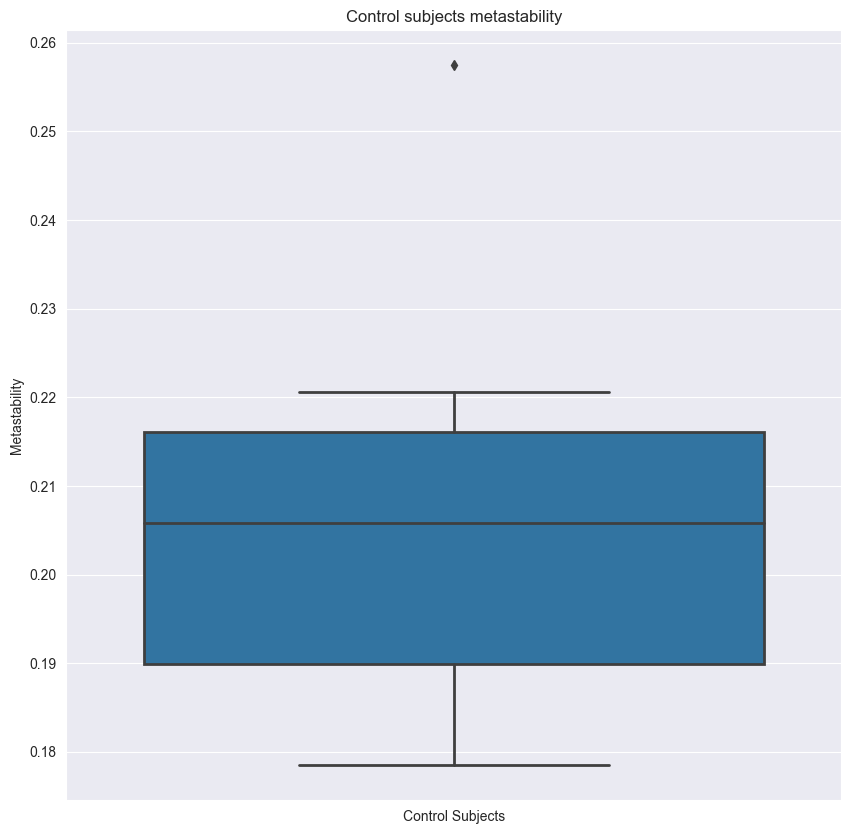

In [4]:
plt.figure(figsize=(10, 10))
seaborn.boxplot(
    data=pd.DataFrame(
        data=[m.metastability for m in subjects.get_control_subset().keep_only_from_this_set(metastabilities).values()],
        columns=['Control Subjects']
    ),
    linewidth=2.0
).set(ylabel='Metastability')
plt.title("Control subjects metastability")
plt.show()

Compute and plot delta metastability for tumor subjects

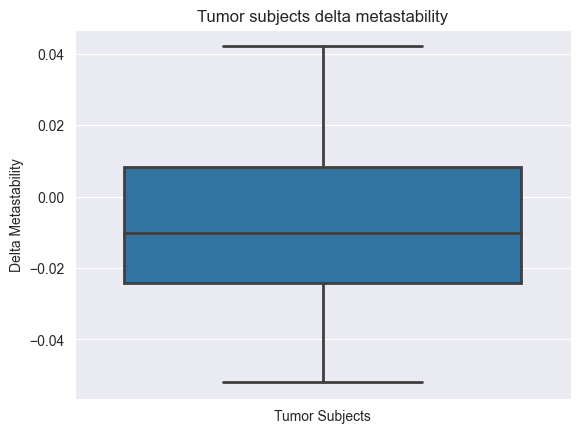

In [5]:
tumor_subjects_delta_metastability = {k: v.metastability - control_subjects_mean_metastability for k, v in subjects.get_tumor_subset().keep_only_from_this_set(metastabilities).items()}

seaborn.boxplot(
    data=pd.DataFrame(
        data=[m for m in tumor_subjects_delta_metastability.values()],
        columns=['Tumor Subjects']
    ),
    linewidth=2.0
).set(ylabel='Delta Metastability')
plt.title("Tumor subjects delta metastability")
plt.show()